In [21]:
import xarray as xr
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from eofs.xarray import Eof
from eofs.multivariate.iris import MultivariateEof
import iris
#import iris.plot as iplt
#import iris.quickplot as qplt
import datetime

#sparta = xr.open_dataset("/raid/home/srvx7/lehre/users/a1402239/Spartacus.nc",chunks={'time': 5000, 'lat':141, 'lon': 141})

analog = pickle.load( open( "save_found_dates_90.p", "rb" ) )

In [27]:
N80 = pickle.load( open( "save_N_list.p", "rb" ) )
N90 = pickle.load( open( "save_N_list_90.p", "rb" ) )
N90_no_r = pickle.load( open( "save_N_list_no_r_90.p", "rb" ) )
N80_no_r = pickle.load( open( "save_N_list_no_r_80.p", "rb" ) )



In [26]:
var80 = pickle.load( open( "save_var_f_list.p", "rb" ) ) 
var90 = pickle.load( open( "save_var_f_list_90.p", "rb" ) ) 
var90_no_r = pickle.load( open( "save_var_f_list_no_r_90.p", "rb" ) )
var80_no_r = pickle.load( open( "save_var_f_list_no_r_80.p", "rb" ) )

In [7]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


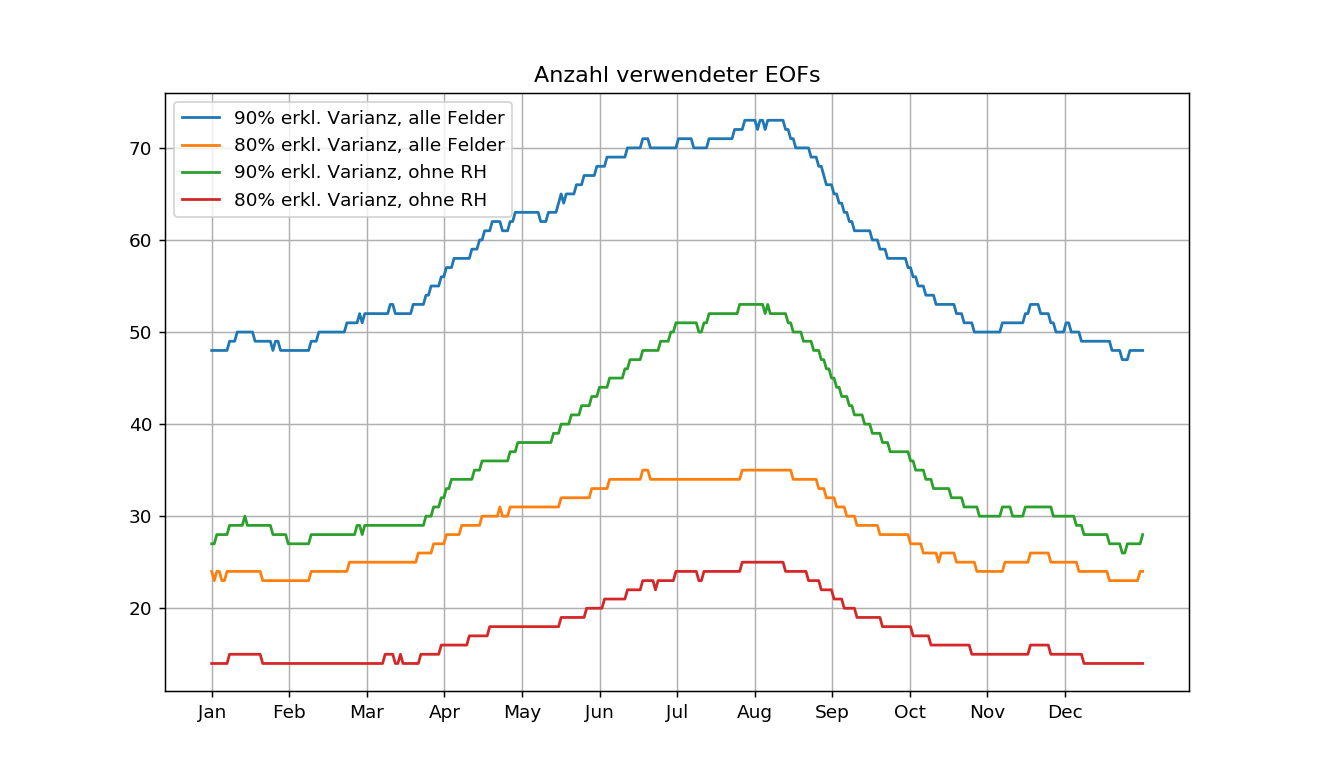

In [34]:
%matplotlib notebook
plt.plot(N90)
plt.plot(N80)
plt.plot(N90_no_r)
plt.plot(N80_no_r)
plt.xticks(np.linspace(0,365,13)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'))
plt.legend(['90% erkl. Varianz, alle Felder','80% erkl. Varianz, alle Felder','90% erkl. Varianz, ohne RH','80% erkl. Varianz, ohne RH'])
plt.title('Anzahl verwendeter EOFs')
plt.grid()

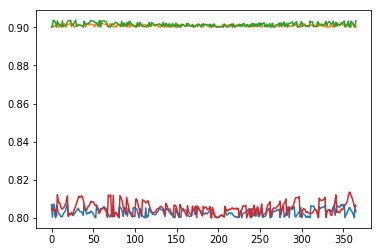

In [29]:
plt.figure()
plt.plot(var80)
plt.plot(var90)
plt.plot(var90_no_r)
plt.plot(var80_no_r)

In [37]:
np.mean(var80_no_r)

0.8050206950127753

In [38]:
np.mean(var90)

0.9009421096473443

In [24]:
analog_no_r = pickle.load( open( "save_found_dates_no_r_90.p", "rb" ) )

In [25]:
analog_no_r

,search_day,found_day
0,1979-01-01,2003-01-05
0,1979-01-02,1987-01-03
0,1979-01-03,2016-01-13
0,1979-01-04,1986-01-08
0,1979-01-05,1989-12-28
0,1979-01-06,2000-01-10
0,1979-01-07,1990-01-11
0,1979-01-08,1988-01-17
0,1979-01-09,2015-01-16
0,1979-01-10,1991-01-08


In [3]:
rmse90 = pickle.load( open( "rmse90.p", "rb" ) )
rmse80 = pickle.load( open( "rmse80.p", "rb" ) )

In [4]:
dti = pd.date_range('1979-01-01', periods=len(rmse90), freq='D')

In [5]:
a = pd.DataFrame(dti,columns=['time'])

In [10]:
rmse80_no_r = pickle.load( open( "rmse80_no_r.p", "rb" ) )
a['rmse80_no_r']=rmse80_no_r

In [14]:
a['day_of_year'] = a['time'].dt.dayofyear
a['rmse80']=rmse80
a['rmse90']=rmse90

<IPython.core.display.Javascript object>


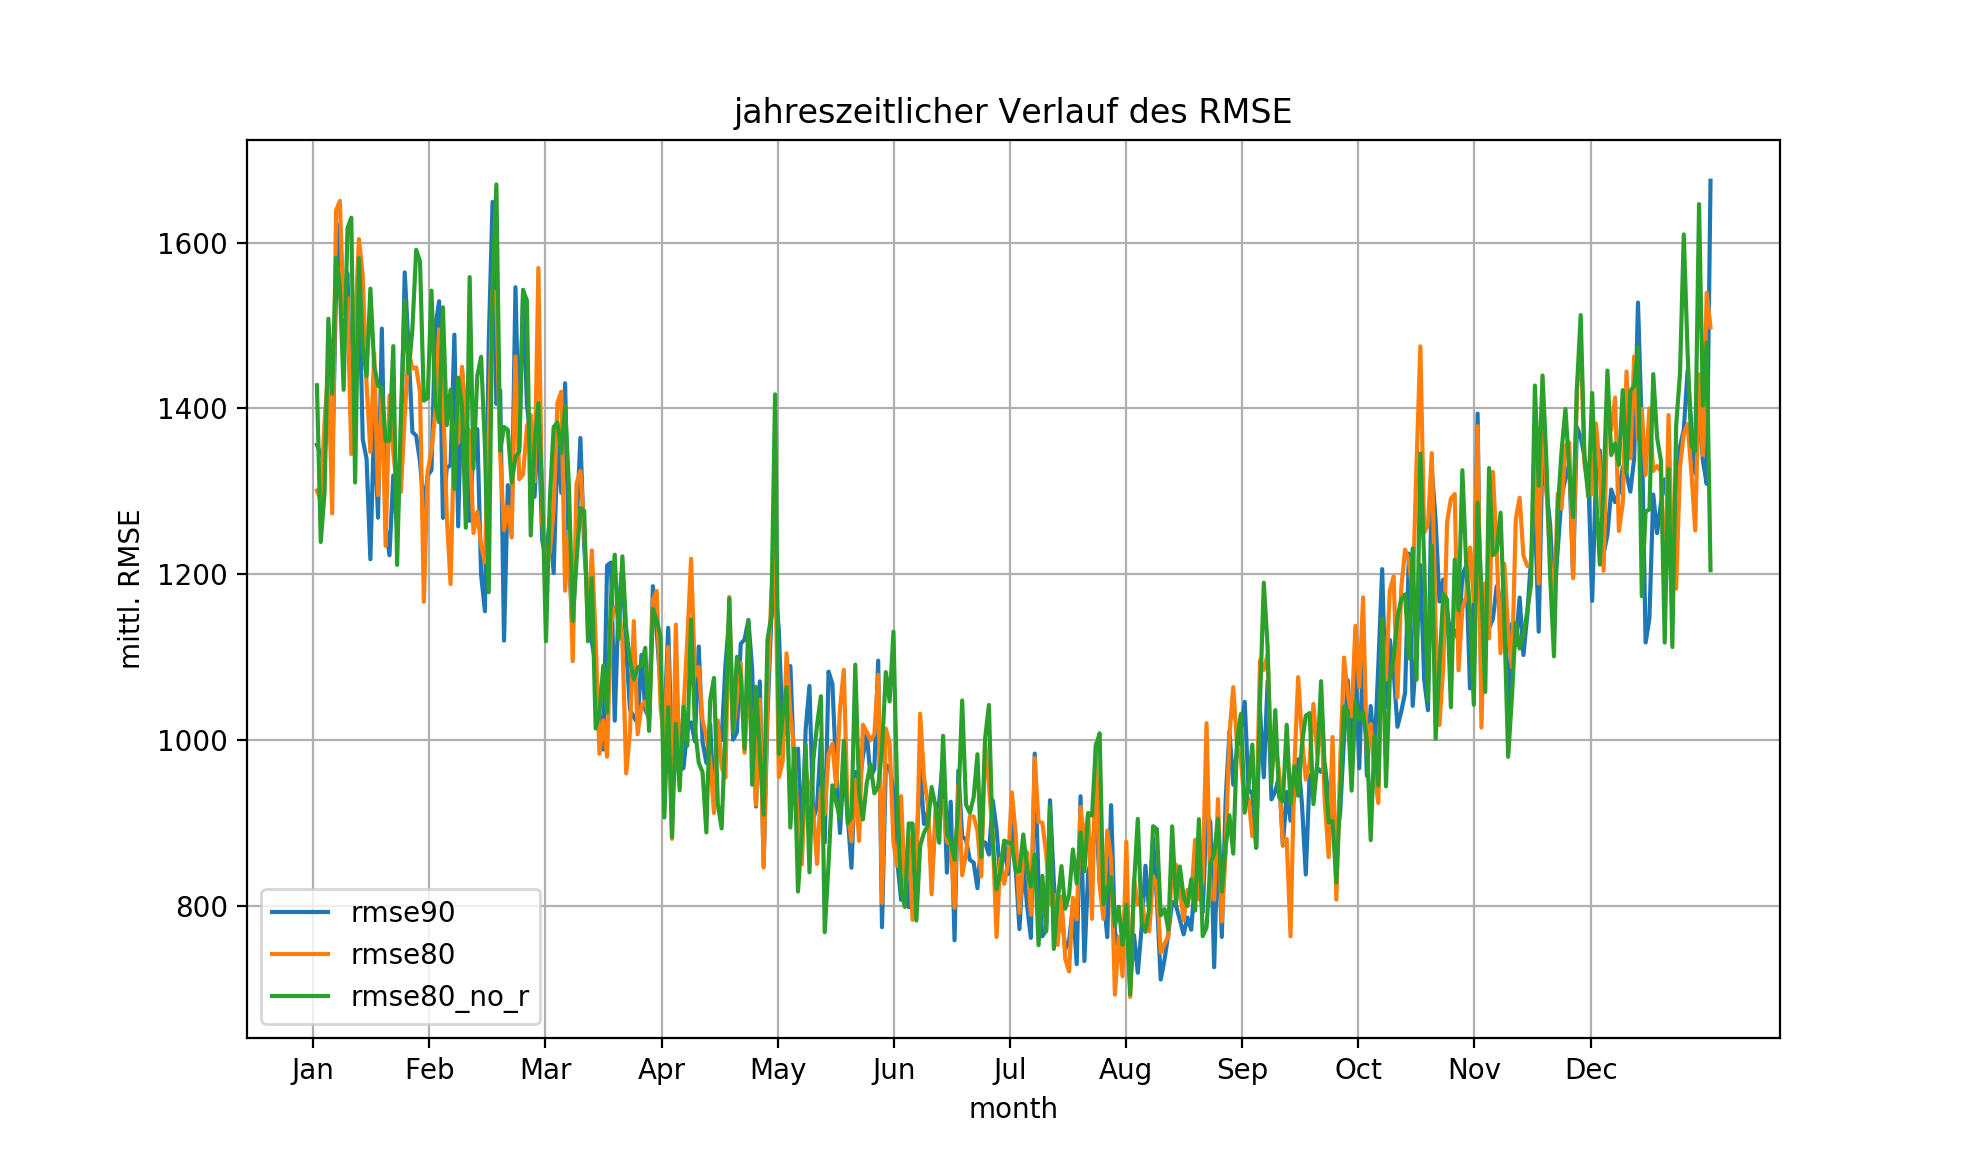

In [12]:
%matplotlib notebook
a.groupby('day_of_year')['rmse90','rmse80','rmse80_no_r'].mean().plot()
plt.xticks(np.linspace(0,365,13)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'))
plt.xlabel('month'),plt.ylabel('mittl. RMSE'),plt.title('jahreszeitlicher Verlauf des RMSE')
plt.grid()
#plt.plot(a['rmse90'][9497:9861].values)

<IPython.core.display.Javascript object>


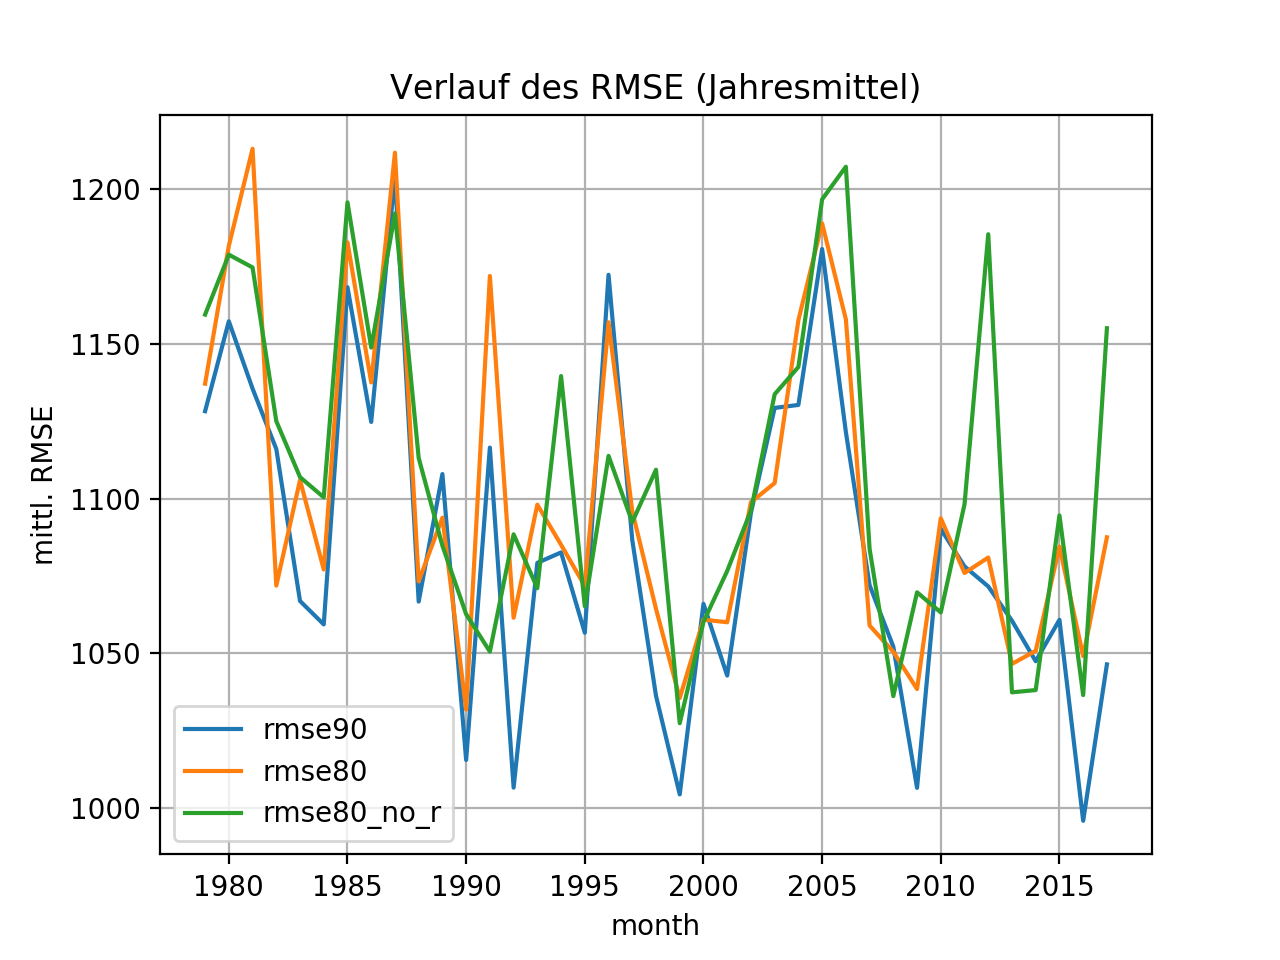

In [13]:
a['year'] = a['time'].dt.year
a.groupby('year')['rmse90','rmse80','rmse80_no_r'].mean().plot()
plt.xlabel('month'),plt.ylabel('mittl. RMSE'),plt.title('Verlauf des RMSE (Jahresmittel)')
plt.grid()

In [72]:
np.nanmean(a['rmse90'].values)

1085.7087476515762

In [75]:
np.nanmean(a['rmse80'].values)

1100.2723439673869

In [86]:
a['time'][9497]

Timestamp('2005-01-01 00:00:00')

In [17]:
a['rmse90'].idxmin()

11537

Timestamp('1998-07-28 00:00:00')